In [35]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2021-04-19T19:24:30.460864+02:00

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [36]:
import pandas as pd

In [37]:
import sys
!{system.executable}

zsh:1: command not found: system.executable


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) #10 pulgadas de ancho y 10 de alto para todos los plots

### Data Reading

In [39]:
vehicles = pd.read_csv("../data/vehicles.2.clean_analysis.csv")

In [40]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


In this case, we are going to group those variables which can be gathered into more generic groups. This will help us to analyze the dataset by clusters instead individual elements. 

To perform this step, we can see the number of different values each categorial variable may have. 

In [41]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))
unique_col_values(vehicles)

manufacturer | 133 | object
model | 3791 | object
year | 35 | int64
displ | 67 | float64
cylinders | 10 | float64
transmission | 38 | object
drive wheels | 8 | object
Class | 34 | object
fuelType | 14 | object
consumption | 84 | int64
CO2 emissions | 597 | float64


### Categorical variables clustering

#### Model car

In [43]:
vehicles.Class.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [45]:
small = ['Compact Cars', 'Subcompact Cars', 'Two Seaters', 'Minicompact Cars']
medium = ['Midsize Cars']
large = ['Large Cars']

vehicles.loc[vehicles['Class'].isin(small),
            'Class'] = 'Small Cars'

vehicles.loc[vehicles['Class'].isin(medium),
            'Class'] = 'Medium Cars'

vehicles.loc[vehicles['Class'].isin(large),
            'Class'] = 'Large Cars'

vehicles.loc[vehicles['Class'].str.contains('Truck'),
            'Class'] = 'Trucks'

vehicles.loc[vehicles['Class'].str.contains('Special Purpose'),
            'Class'] = 'Special Vehicles'

vehicles.loc[vehicles['Class'].str.contains('Sports'),
            'Class'] = 'Sport Car'

vehicles.loc[vehicles['Class'].str.contains('Station'), 
            'Class'] = 'Station'

vehicles.loc[(vehicles['Class'].str.lower().str.contains('van')),
            'Class'] = 'Van'

In [47]:
vehicles.Class = vehicles.Class.astype("category")

In [48]:
vehicles.Class.value_counts()

Small Cars                            13055
Trucks                                 5446
Medium Cars                            4274
Station                                2540
Special Vehicles                       2216
Van                                    2213
Sport Utility Vehicle - 4WD            2074
Large Cars                             1873
Sport Utility Vehicle - 2WD            1621
Small Sport Utility Vehicle 4WD         564
Standard Sport Utility Vehicle 4WD      445
Small Sport Utility Vehicle 2WD         424
Standard Sport Utility Vehicle 2WD      185
Name: Class, dtype: int64

### Trany type

In [50]:
vehicles['drive wheels'].unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [51]:
vehicles["drive"] = "two"
vehicles["drive"][vehicles.drive.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
       "4-Wheel Drive", "Part-time 4-Wheel Drive"
])] = "four"

This warning is communicating to us we are alterating a copy of vehicles (vehicles_year), not vehicles.
To undo it:

In [52]:
pd.set_option('chained_assignment', None)

Or simply use loc to asign values on pandas

In [53]:
vehicles["drive"] = "two"
vehicles.loc[vehicles.drive.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
       "4-Wheel Drive", "Part-time 4-Wheel Drive"
]), "drive"] = "four"

In [54]:
vehicles.drive = vehicles.drive.astype("category")

### Transmission

In [55]:
vehicles.transmission.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

We see that transmissions can be categorized by manual or automatic

In [56]:
vehicles['transmission'] = "Automatic"

vehicles.loc[vehicles['transmission'].str.startswith('M'),
            'transmission'] = "Manual"

In case of an error, we shall check whether exist null values on the category

In [57]:
vehicles[vehicles['transmission'].isnull()]

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,drive


In [58]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,drive
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Vehicles,Regular,17,522.764706,two
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Vehicles,Regular,13,683.615385,two
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Vehicles,Regular,16,555.437500,two
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Vehicles,Regular,13,683.615385,two
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Medium Cars,Premium,16,555.437500,two


### Fuel Type

In [59]:
vehicles.fuelType.value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Electricity                      139
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: fuelType, dtype: int64

As we see the distribution of cars by fuelType are concentrated. Thus, we will gather these categories and join them among those which are valid for our study: "Polution" 

In [60]:
vehicles.loc[vehicles['fuelType'].str.contains('Regular'),
            'fuelType'] = 'Normal'

vehicles.loc[vehicles['fuelType'].str.contains('Premium'),
            'fuelType'] = 'Premium'

vehicles.loc[vehicles['fuelType'].str.contains('Electricity'),
            'fuelType'] = 'Hybrid'

In [61]:
vehicles.fuelType.value_counts()

Normal                     24100
Premium                    10378
Gasoline or E85             1215
Diesel                       933
Hybrid                       139
Midgrade                      77
CNG                           60
Gasoline or natural gas       20
Gasoline or propane            8
Name: fuelType, dtype: int64

In [62]:
vehicles.loc[vehicles['fuelType'].str.contains('Regular'),
            'fuelType'] = 'Normal'

vehicles.loc[vehicles['fuelType'].str.contains('Premium'),
            'fuelType'] = 'Premium'

vehicles.loc[vehicles['fuelType'].str.contains('Electricity'),
            'fuelType'] = 'Hybrid'

vehicles.loc[vehicles.fuelType.isin([
    "Diesel", "Midgrade",
    "CNG", "Gasoline or natural gas",
    "Gasoline or propane"
]),"fuelType" ] = "Others"

In [63]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,drive
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,17,522.764706,two
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,13,683.615385,two
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,16,555.437500,two
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,13,683.615385,two
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Medium Cars,Premium,16,555.437500,two


In [64]:
vehicles.fuelType.value_counts()

Normal             24100
Premium            10378
Gasoline or E85     1215
Others              1098
Hybrid               139
Name: fuelType, dtype: int64

In [65]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,drive
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,17,522.764706,two
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,13,683.615385,two
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,16,555.437500,two
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,13,683.615385,two
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Medium Cars,Premium,16,555.437500,two


### Continuous variables clustering

A simple way to convert continuous variables is by using quintiles

In [66]:
types_motor_size = ['very small', 'small', 'medium', 'large', 'very large']

vehicles['types_motor_size'] = pd.qcut(vehicles['displ'],
                                     5, types_motor_size)

In [84]:
types_consumption = ['very small', 'small', 'medium' , 'large', 'very large']

vehicles['types_consumption'] = pd.qcut(vehicles['consumption'], 
                                       5, types_consumption)

In [85]:
types_co2 = ['very small', 'small', 'medium' , 'large', 'very large']

vehicles['co2_type'] = pd.qcut(vehicles['CO2 emissions'],
                              5, types_co2)

In [86]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,drive,types_motor_size,co2_type,consumption_litres_mile,type_consumption,types_consumption
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,17,522.764706,two,small,large,0.222671,large,small
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,13,683.615385,two,large,very large,0.291185,very large,very small
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,16,555.437500,two,small,large,0.236588,large,very small
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,13,683.615385,two,large,very large,0.291185,very large,very small
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Medium Cars,Premium,16,555.437500,two,large,large,0.236588,large,very small


When checking the dataset, we noticed there is an error between the comb08 which stands for combined Miles per Galon (fuel consumption)and CO2.
Those cars which consume more fuel are, indeed, those that are going to emit more polution.
So, we see how the variables relates with each other

<AxesSubplot:xlabel='consumption', ylabel='CO2 emissions'>

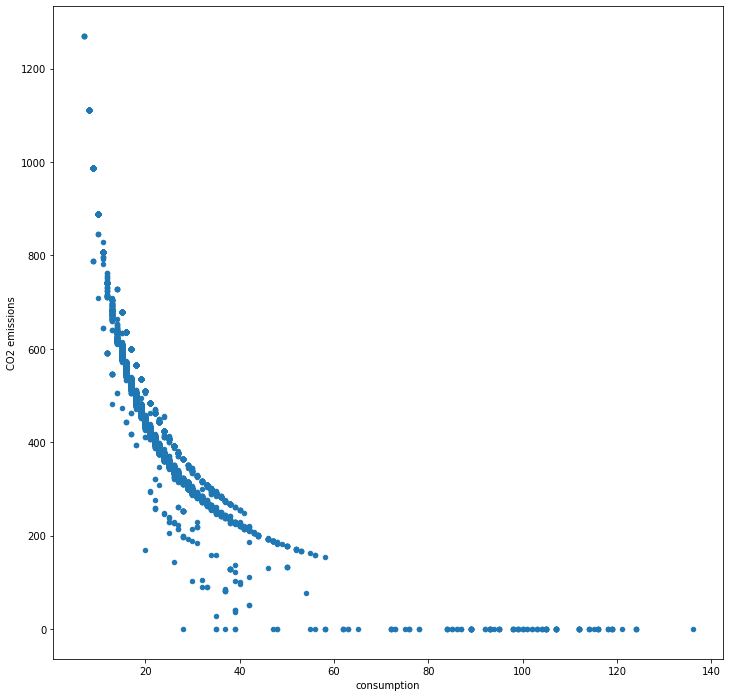

In [87]:
vehicles.plot.scatter(x="consumption", y="CO2 emissions")

This inverse relation are explained on the documentation of the dataset. CO2 consumption is measured by grams per mile, while the consumption is measured by miles per galon.
We need to invert the consumption to galons per mile.

Besides, we are going to measure litres per galon.


In [88]:
litres_per_galon = 3.78541
vehicles['consumption_litres_mile'] = litres_per_galon / vehicles.consumption

In [89]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,drive,types_motor_size,co2_type,consumption_litres_mile,type_consumption,types_consumption
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,17,522.764706,two,small,large,0.222671,large,small
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,13,683.615385,two,large,very large,0.291185,very large,very small
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,16,555.437500,two,small,large,0.236588,large,very small
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,13,683.615385,two,large,very large,0.291185,very large,very small
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Medium Cars,Premium,16,555.437500,two,large,large,0.236588,large,very small


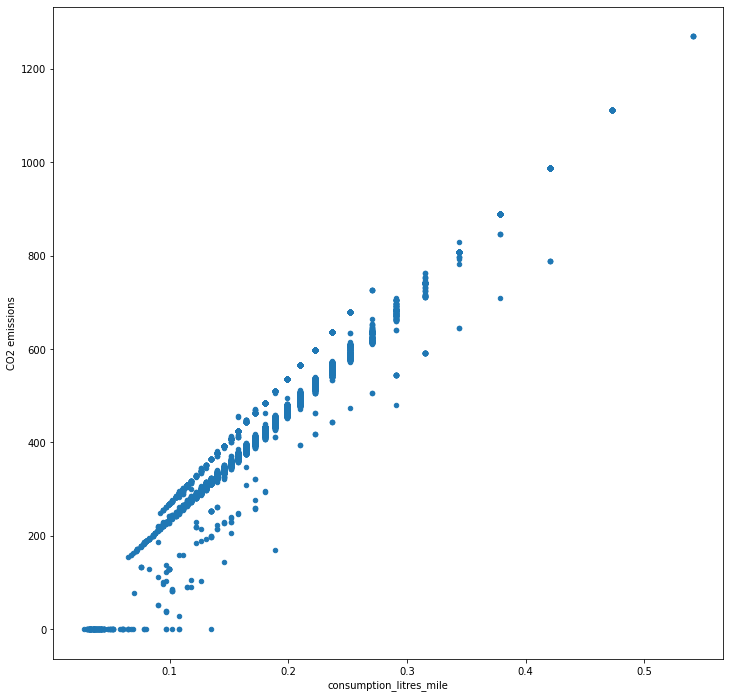

In [90]:
vehicles.plot.scatter(x='consumption_litres_mile', y='CO2 emissions');

In [91]:
types_consumption = ['very small', 'small', 'medium' , 'large', 'very large']
vehicles['types_consumption'] = pd.qcut(vehicles['consumption_litres_mile'],
                                      5, types_consumption)
vehicles.types_consumption.head()

0         large
1    very large
2         large
3    very large
4         large
Name: types_consumption, dtype: category
Categories (5, object): ['very small' < 'small' < 'medium' < 'large' < 'very large']

In [92]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive wheels,Class,fuelType,consumption,CO2 emissions,drive,types_motor_size,co2_type,consumption_litres_mile,type_consumption,types_consumption
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,17,522.764706,two,small,large,0.222671,large,large
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,2-Wheel Drive,Special Vehicles,Normal,13,683.615385,two,large,very large,0.291185,very large,very large
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,16,555.437500,two,small,large,0.236588,large,large
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,Rear-Wheel Drive,Special Vehicles,Normal,13,683.615385,two,large,very large,0.291185,very large,very large
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,Rear-Wheel Drive,Medium Cars,Premium,16,555.437500,two,large,large,0.236588,large,large


In [93]:
vehicles.dtypes

manufacturer                 object
model                        object
year                          int64
displ                       float64
cylinders                   float64
transmission                 object
drive wheels                 object
Class                      category
fuelType                     object
consumption                   int64
CO2 emissions               float64
drive                      category
types_motor_size           category
co2_type                   category
consumption_litres_mile     float64
type_consumption           category
types_consumption          category
dtype: object

### Conclussion
Consumption variable is defined by miles per galon and the CO2 is defined by grames per mile.
Since the CO2 is the main variable of the dataset, we have created another variable called consumption_litres_mile in order to compare it with CO2

### Exporting
It is very common to save the datafile as CSV. The main problem arises using CSV is all data calculated or obtained over the dataframe will be lost.

We shall instead, save the file on a Python native format to save dataframes in between steps, for the later saving of the final dataset as CSV file.

The standard serialization of Python is Pyckle. From an user point of view, it will found the dataset the same way we found when closing Jupyter notebook and reopen it again. 

In [94]:
vehicles.to_pickle("../data/vehicles.3.clustered_variables.pkl")